In [1]:
import numpy as np
import os
import pandas
import datetime
import matplotlib.pyplot as plt
import world_bank_data as wb
import seaborn as sns; sns.set_theme()

plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
df1 = pandas.read_csv("crunched_data_filled.csv")

# Redukcja do 2D

In [3]:
df_new = df1.copy()
df_new = df_new.drop(columns=[
    "Unnamed: 0",
    "countriesAndTerritories",
    "countryterritoryCode",
    "continentExp",
    "popData2019",
    "casesSinceNovember",
    "deathsSinceNovember",
    "casesSinceSeptember",
    "deathsSinceSeptember",
])
df_new

,casesPer1000,deathsPer1000,NovemberCasesPercent,NovemberDeathsPercent,NY.GDP.PCAP.CD,EN.POP.DNST,SH.MED.BEDS.ZS,SH.MED.PHYS.ZS,SP.POP.65UP.TO.ZS,SH.STA.TRAF.P5,EN.ATM.PM25.MC.M3
0,0.133485,0.005652,0.357424,0.376744,502.115487,56.937760,0.5,0.27820,2.615794,15.10,56.910808
1,6.237015,0.115985,0.369630,0.331325,5352.857411,104.612263,2.9,1.21640,14.202631,13.60,18.200603
2,0.526629,0.014819,0.404358,0.286834,3948.343279,17.730075,1.9,1.71930,6.552778,23.80,38.884011
3,60.398808,0.288801,0.230385,0.611111,40886.391165,163.842553,2.5,3.33330,14.465041,7.60,10.307621
4,0.333194,0.006599,0.279046,0.200000,2973.591160,24.713052,0.8,0.21460,2.199342,23.60,32.388505
...,...,...,...,...,...,...,...,...,...,...,...
208,0.008644,0.011059,1.000000,1.000000,3161.530935,177.556225,2.1,0.39795,3.392263,11.15,17.675435
209,6.477679,0.096792,0.120453,0.088367,5229.344178,69.311013,2.6,0.99575,5.856752,19.75,29.779355
210,0.004081,0.001337,0.075630,0.076923,968.159048,53.977853,0.7,0.52510,2.902141,21.50,50.456007
211,0.283970,0.003527,0.134464,0.015873,1291.343357,23.341479,2.0,1.18670,2.115315,24.70,27.438035


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_new)
principalDf = pandas.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf = principalDf.join(df1['countriesAndTerritories'])
principalDf

,principal component 1,principal component 2,countriesAndTerritories
0,-20875.056149,374.731684,Afghanistan
1,-16026.468048,222.142475,Albania
2,-17433.378440,193.338621,Algeria
3,19479.254923,-1184.881912,Andorra
4,-18407.011306,240.530352,Angola
...,...,...,...
208,-18212.919388,385.457552,Wallis_and_Futuna
209,-16151.337006,191.999344,Western_Sahara
210,-20409.531438,352.539752,Yemen
211,-20087.882066,308.564174,Zambia


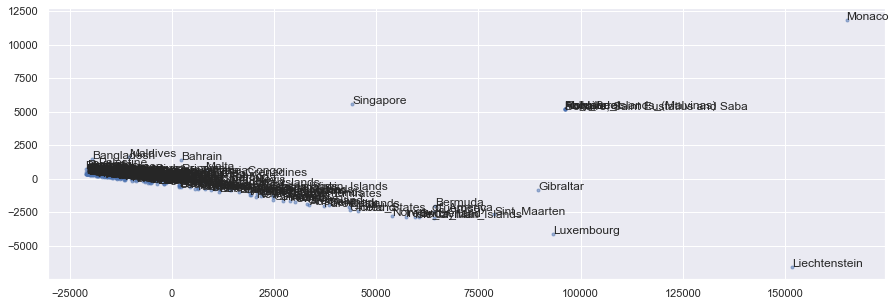

In [5]:
#%matplotlib notebook
plt.scatter(principalDf["principal component 1"], principalDf["principal component 2"], alpha=0.5, marker='.')
for i, txt in enumerate(principalDf.countriesAndTerritories):
    plt.annotate(txt, (principalDf["principal component 1"][i], principalDf["principal component 2"][i]))

# Tylko dane o zachorowaniach i smierciach

In [6]:
df_new = df1.copy()
df_new = df_new.drop(columns=[
    "Unnamed: 0",
    "countriesAndTerritories",
    "countryterritoryCode",
    "continentExp",
    "popData2019",
    "casesSinceNovember",
    "deathsSinceNovember",
    "casesSinceSeptember",
    "deathsSinceSeptember",
    "NY.GDP.PCAP.CD",
    "EN.POP.DNST",
    "SH.MED.BEDS.ZS",
    "SH.MED.PHYS.ZS",
    "SP.POP.65UP.TO.ZS",
    "SH.STA.TRAF.P5",
    "EN.ATM.PM25.MC.M3",
])
df_new

,casesPer1000,deathsPer1000,NovemberCasesPercent,NovemberDeathsPercent
0,0.133485,0.005652,0.357424,0.376744
1,6.237015,0.115985,0.369630,0.331325
2,0.526629,0.014819,0.404358,0.286834
3,60.398808,0.288801,0.230385,0.611111
4,0.333194,0.006599,0.279046,0.200000
...,...,...,...,...
208,0.008644,0.011059,1.000000,1.000000
209,6.477679,0.096792,0.120453,0.088367
210,0.004081,0.001337,0.075630,0.076923
211,0.283970,0.003527,0.134464,0.015873


In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_new)
principalDf = pandas.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf = principalDf.join(df1['countriesAndTerritories'])
principalDf

,principal component 1,principal component 2,countriesAndTerritories
0,-6.181691,0.054859,Afghanistan
1,-0.077735,-0.013042,Albania
2,-5.788755,-0.005089,Algeria
3,54.083915,-0.095287,Andorra
4,-5.982957,-0.138899,Angola
...,...,...,...
208,-6.302066,0.905207,Wallis_and_Futuna
209,0.161052,-0.344167,Western_Sahara
210,-6.313176,-0.340538,Yemen
211,-6.033386,-0.368615,Zambia


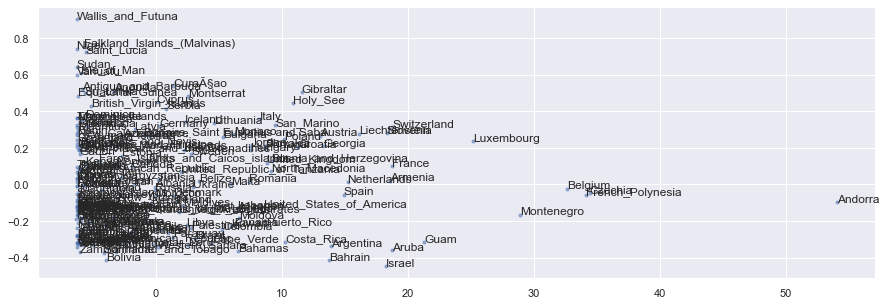

In [8]:
#%matplotlib notebook
plt.scatter(principalDf["principal component 1"], principalDf["principal component 2"], alpha=0.5, marker='.')
for i, txt in enumerate(principalDf.countriesAndTerritories):
    plt.annotate(txt, (principalDf["principal component 1"][i], principalDf["principal component 2"][i]))

# Bez redukcji wymiarow

In [9]:
df_new = df1.copy()
df_new = df_new.drop(columns=[
    "Unnamed: 0",
    "countriesAndTerritories",
    "countryterritoryCode",
    "continentExp",
    "popData2019",
    "casesSinceNovember",
    "deathsSinceNovember",
    "casesSinceSeptember",
    "deathsSinceSeptember",
])

cols = df_new.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_new = df_new[cols]
df_new

,EN.ATM.PM25.MC.M3,casesPer1000,deathsPer1000,NovemberCasesPercent,NovemberDeathsPercent,NY.GDP.PCAP.CD,EN.POP.DNST,SH.MED.BEDS.ZS,SH.MED.PHYS.ZS,SP.POP.65UP.TO.ZS,SH.STA.TRAF.P5
0,56.910808,0.133485,0.005652,0.357424,0.376744,502.115487,56.937760,0.5,0.27820,2.615794,15.10
1,18.200603,6.237015,0.115985,0.369630,0.331325,5352.857411,104.612263,2.9,1.21640,14.202631,13.60
2,38.884011,0.526629,0.014819,0.404358,0.286834,3948.343279,17.730075,1.9,1.71930,6.552778,23.80
3,10.307621,60.398808,0.288801,0.230385,0.611111,40886.391165,163.842553,2.5,3.33330,14.465041,7.60
4,32.388505,0.333194,0.006599,0.279046,0.200000,2973.591160,24.713052,0.8,0.21460,2.199342,23.60
...,...,...,...,...,...,...,...,...,...,...,...
208,17.675435,0.008644,0.011059,1.000000,1.000000,3161.530935,177.556225,2.1,0.39795,3.392263,11.15
209,29.779355,6.477679,0.096792,0.120453,0.088367,5229.344178,69.311013,2.6,0.99575,5.856752,19.75
210,50.456007,0.004081,0.001337,0.075630,0.076923,968.159048,53.977853,0.7,0.52510,2.902141,21.50
211,27.438035,0.283970,0.003527,0.134464,0.015873,1291.343357,23.341479,2.0,1.18670,2.115315,24.70


In [10]:
pca = PCA(n_components=len(df_new.columns))
principalComponents = pca.fit_transform(df_new)
principalDf = pandas.DataFrame(data = principalComponents)
principalDf = principalDf.join(df1['countriesAndTerritories'])
principalDf

,0,1,2,3,4,5,6,7,8,9,10,countriesAndTerritories
0,-20875.056149,374.731684,25.399832,2.417145,-8.199802,-3.929037,-0.994050,-0.596099,0.111387,0.071147,-0.032427,Afghanistan
1,-16026.468048,222.142475,-13.256389,2.751195,-3.573395,2.580275,-1.688442,-1.075878,-0.053676,0.072029,-0.012271,Albania
2,-17433.378440,193.338621,9.954837,-3.709133,0.845593,1.924219,-0.138465,0.745028,0.060268,0.127334,-0.038973,Algeria
3,19479.254923,-1184.881912,-15.433548,43.511239,23.041506,-7.883510,-1.209983,-0.636230,0.145703,-0.180751,-0.216082,Andorra
4,-18407.011306,240.530352,4.101938,-6.301250,2.630427,-2.760832,-0.199309,-0.269924,-0.033841,0.083571,-0.056821,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...
208,-18212.919388,385.457552,-12.671023,-4.269064,-6.099129,-7.165425,0.135059,-0.998178,0.936841,0.338730,-0.067970,Wallis_and_Futuna
209,-16151.337006,191.999344,0.311366,0.688815,1.993579,-1.643150,0.541223,-0.365069,-0.262133,-0.016468,-0.018038,Western_Sahara
210,-20409.531438,352.539752,20.374666,-1.455037,-2.175783,-1.583993,-0.573986,-0.088022,-0.256323,-0.042100,-0.038537,Yemen
211,-20087.882066,308.564174,-1.128040,-7.356455,3.837042,-2.412149,1.137632,0.580191,-0.249604,0.028676,-0.067766,Zambia


In [11]:
pca.explained_variance_ratio_

array([9.97533521e-01, 2.46601908e-03, 3.10795086e-07, 8.07689655e-08,
       4.83641254e-08, 1.51048166e-08, 3.99107754e-09, 1.23139181e-09,
       5.94419296e-11, 1.72981677e-11, 6.45915955e-12])

In [12]:
pca.singular_values_

array([4.57424870e+05, 2.27433398e+04, 2.55324856e+02, 1.30160223e+02,
       1.00720458e+02, 5.62877324e+01, 2.89335090e+01, 1.60714164e+01,
       3.53103867e+00, 1.90482936e+00, 1.16397601e+00])

In [22]:
pca.components_[0]
# index - 5

array([-2.15752413e-04,  8.76682942e-05,  1.95232340e-07,  1.18786247e-06,
        3.36560187e-06,  9.99148343e-01,  4.12612116e-02,  4.70400021e-05,
        3.70351705e-05,  7.88662913e-05, -1.92553107e-04])

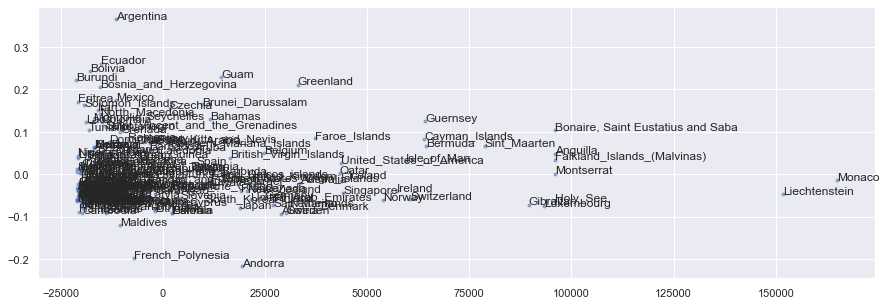

In [14]:
#%matplotlib notebook
plt.scatter(principalDf[0], principalDf[10], alpha=0.5, marker='.')
for i, txt in enumerate(principalDf.countriesAndTerritories):
    plt.annotate(txt, (principalDf[0][i], principalDf[10][i]))

# standaryzacja danych